In [1]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline

## 파일 불러오기

In [2]:
beeradvocate = pd.read_json("./data/new_beeradvocate.json", lines=True)
# ratebeer = pd.read_json("./data/new_ratebeer.json", lines=True)

## beeradvocate

In [3]:
beeradvocate.head()

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
0,Sausa Weizen,47986.0,10325.0,5.00,Hefeweizen,2.5,2.0,1.5,1.5,1.5,1.234818e+09,stcules,A lot of foam. But a lot.\tIn the smell some b...
1,Red Moon,48213.0,10325.0,6.20,English Strong Ale,3.0,2.5,3.0,3.0,3.0,1.235915e+09,stcules,"Dark red color, light beige foam, average.\tIn..."
2,Black Horse Black Beer,48215.0,10325.0,6.50,Foreign / Export Stout,3.0,2.5,3.0,3.0,3.0,1.235917e+09,stcules,"Almost totally black. Beige foam, quite compac..."
3,Sausa Pils,47969.0,10325.0,5.00,German Pilsener,3.5,3.0,2.5,3.0,3.0,1.234725e+09,stcules,"Golden yellow color. White, compact foam, quit..."
4,Cauldron DIPA,64883.0,1075.0,7.70,American Double / Imperial IPA,4.0,4.5,4.0,4.5,4.0,1.293735e+09,johnmichaelsen,"According to the website, the style for the Ca..."


In [4]:
beeradvocate.tail()

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
1586610,The Horseman's Ale,33061.0,14359.0,5.20,Pumpkin Ale,2.5,5.0,2.0,4.0,4.0,1.161049e+09,yelterdow,Growler fill from the long-awaited Defiant Bre...
1586611,The Horseman's Ale,33061.0,14359.0,5.20,Pumpkin Ale,3.0,3.5,3.5,4.0,4.5,1.160703e+09,TongoRad,This was served from a growler and I suspect a...
1586612,The Horseman's Ale,33061.0,14359.0,5.20,Pumpkin Ale,4.5,4.5,4.5,4.5,4.0,1.160023e+09,dherling,"Ah, the horseman commeth. Cloudy chocolate bro..."
1586613,The Horseman's Ale,33061.0,14359.0,5.20,Pumpkin Ale,4.5,4.5,4.5,4.5,5.0,1.160005e+09,cbl2,10/4/2006\t$7.50 5.20% Fresh on tap. \t\tAppea...
1586614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
beeradvocate.drop(beeradvocate.index[1586614], inplace = True)
beeradvocate.tail()

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
1586609,The Horseman's Ale,33061.0,14359.0,5.20,Pumpkin Ale,3.5,4.0,4.0,4.0,5.0,1.162685e+09,maddogruss,If you're looking for a quality beer right alo...
1586610,The Horseman's Ale,33061.0,14359.0,5.20,Pumpkin Ale,2.5,5.0,2.0,4.0,4.0,1.161049e+09,yelterdow,Growler fill from the long-awaited Defiant Bre...
1586611,The Horseman's Ale,33061.0,14359.0,5.20,Pumpkin Ale,3.0,3.5,3.5,4.0,4.5,1.160703e+09,TongoRad,This was served from a growler and I suspect a...
1586612,The Horseman's Ale,33061.0,14359.0,5.20,Pumpkin Ale,4.5,4.5,4.5,4.5,4.0,1.160023e+09,dherling,"Ah, the horseman commeth. Cloudy chocolate bro..."
1586613,The Horseman's Ale,33061.0,14359.0,5.20,Pumpkin Ale,4.5,4.5,4.5,4.5,5.0,1.160005e+09,cbl2,10/4/2006\t$7.50 5.20% Fresh on tap. \t\tAppea...


In [6]:
beeradvocate.shape

(1586614, 13)

In [7]:
beeradvocate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   beer/name           1586614 non-null  object 
 1   beer/beerId         1586614 non-null  float64
 2   beer/brewerId       1586614 non-null  float64
 3   beer/ABV            1586614 non-null  object 
 4   beer/style          1586614 non-null  object 
 5   review/appearance   1586614 non-null  float64
 6   review/aroma        1586614 non-null  float64
 7   review/palate       1586614 non-null  float64
 8   review/taste        1586614 non-null  float64
 9   review/overall      1586614 non-null  float64
 10  review/time         1586614 non-null  float64
 11  review/profileName  1586614 non-null  object 
 12  review/text         1586614 non-null  object 
dtypes: float64(8), object(5)
memory usage: 157.4+ MB


### beer/name

In [8]:
# 맥주 종류별 리뷰 수
beeradvocate['beer/name'].value_counts()

90 Minute IPA                           3290
India Pale Ale                          3130
Old Rasputin Russian Imperial Stout     3111
Sierra Nevada Celebration Ale           3000
Two Hearted Ale                         2728
                                        ... 
Treize Chanceux 13th Anniversary Ale       1
Frank's 1st IPA                            1
American Red Wheat                         1
Birra Venezia Rossa Doppio Malto           1
Sausa Weizen                               1
Name: beer/name, Length: 56857, dtype: int64

In [9]:
# 맥주 종류 수
beeradvocate['beer/name'].nunique()

56857

In [10]:
# 각 리뷰 개수 별 맥주 종류 수
beeradvocate['beer/name'].value_counts().value_counts()

1       18908
2        8534
3        4953
4        3278
5        2259
        ...  
738         1
736         1
735         1
732         1
3290        1
Name: beer/name, Length: 956, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='beer/name'>

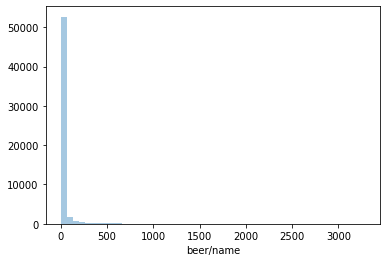

In [11]:
# 각 리뷰 개수 별 맥주 종류 수 분포
sns.distplot(beeradvocate['beer/name'].value_counts(), kde=False)

### beerid

In [12]:
# beerid 소수점 끝자리 확인
beeradvocate['beer/beerId'].astype('str').str.split('.').str[1].value_counts()

0    1586614
Name: beer/beerId, dtype: int64

In [13]:
# int 타입으로 변환
beeradvocate['beer/beerId'] = beeradvocate['beer/beerId'].astype('int32')
beeradvocate.head()

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
0,Sausa Weizen,47986,10325.0,5.00,Hefeweizen,2.5,2.0,1.5,1.5,1.5,1.234818e+09,stcules,A lot of foam. But a lot.\tIn the smell some b...
1,Red Moon,48213,10325.0,6.20,English Strong Ale,3.0,2.5,3.0,3.0,3.0,1.235915e+09,stcules,"Dark red color, light beige foam, average.\tIn..."
2,Black Horse Black Beer,48215,10325.0,6.50,Foreign / Export Stout,3.0,2.5,3.0,3.0,3.0,1.235917e+09,stcules,"Almost totally black. Beige foam, quite compac..."
3,Sausa Pils,47969,10325.0,5.00,German Pilsener,3.5,3.0,2.5,3.0,3.0,1.234725e+09,stcules,"Golden yellow color. White, compact foam, quit..."
4,Cauldron DIPA,64883,1075.0,7.70,American Double / Imperial IPA,4.0,4.5,4.0,4.5,4.0,1.293735e+09,johnmichaelsen,"According to the website, the style for the Ca..."


In [14]:
#beerid 별 리뷰 수
beeradvocate['beer/beerId'].value_counts()

2093     3290
412      3111
1904     3000
1093     2728
92       2704
         ... 
44031       1
44248       1
44247       1
44032       1
47986       1
Name: beer/beerId, Length: 66055, dtype: int64

<AxesSubplot:>

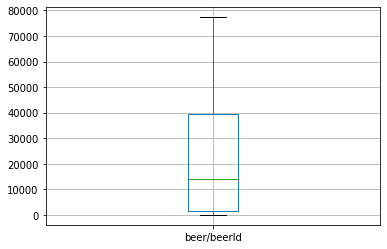

In [15]:
# beerid 통계치
beeradvocate[['beer/beerId']].boxplot()

In [16]:
# beerid 통계치
beeradvocate[['beer/beerId']].describe()

,beer/beerId
count,1.586614e+06
mean,2.171279e+04
std,2.181834e+04
min,3.000000e+00
25%,1.717000e+03
50%,1.390600e+04
75%,3.944100e+04
max,7.731700e+04


In [17]:
# beerid 최소
beeradvocate['beer/beerId'].min()

3

In [18]:
# beerid 최대
beeradvocate['beer/beerId'].max()

77317

### brewerID

In [19]:
# brewerid 소수점 끝자리 확인
beeradvocate['beer/brewerId'].astype('str').str.split('.').str[1].value_counts()

0    1586614
Name: beer/brewerId, dtype: int64

In [20]:
# int 타입으로 변환
beeradvocate['beer/brewerId'] = beeradvocate['beer/brewerId'].astype('int32')
beeradvocate.head()

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
0,Sausa Weizen,47986,10325,5.00,Hefeweizen,2.5,2.0,1.5,1.5,1.5,1.234818e+09,stcules,A lot of foam. But a lot.\tIn the smell some b...
1,Red Moon,48213,10325,6.20,English Strong Ale,3.0,2.5,3.0,3.0,3.0,1.235915e+09,stcules,"Dark red color, light beige foam, average.\tIn..."
2,Black Horse Black Beer,48215,10325,6.50,Foreign / Export Stout,3.0,2.5,3.0,3.0,3.0,1.235917e+09,stcules,"Almost totally black. Beige foam, quite compac..."
3,Sausa Pils,47969,10325,5.00,German Pilsener,3.5,3.0,2.5,3.0,3.0,1.234725e+09,stcules,"Golden yellow color. White, compact foam, quit..."
4,Cauldron DIPA,64883,1075,7.70,American Double / Imperial IPA,4.0,4.5,4.0,4.5,4.0,1.293735e+09,johnmichaelsen,"According to the website, the style for the Ca..."


In [21]:
#brewerid 별 리뷰 수
beeradvocate['beer/brewerId'].value_counts()

35       39444
10099    33839
147      33066
140      28751
287      25191
         ...  
23699        1
24526        1
24211        1
9559         1
3355         1
Name: beer/brewerId, Length: 5840, dtype: int64

<AxesSubplot:>

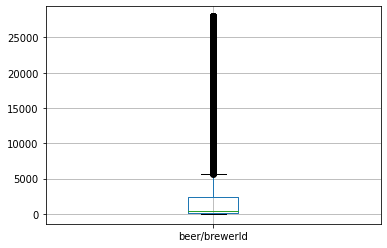

In [22]:
# brewerid 통계치
beeradvocate[['beer/brewerId']].boxplot()

In [23]:
# brewerid 통계치
beeradvocate[['beer/brewerId']].describe()

,beer/brewerId
count,1.586614e+06
mean,3.130099e+03
std,5.578104e+03
min,1.000000e+00
25%,1.430000e+02
50%,4.290000e+02
75%,2.372000e+03
max,2.800300e+04


In [24]:
# brewerid 최솟값
beeradvocate['beer/brewerId'].min()

1

In [25]:
# brewerid 최대값
beeradvocate['beer/brewerId'].max()

28003

### ABV

In [26]:
beeradvocate['beer/ABV'].value_counts()

5.00     109144
          67785
8.00      67744
6.00      65383
7.00      59460
          ...  
57.70         1
30.86         1
5.09          1
7.51          1
17.35         1
Name: beer/ABV, Length: 531, dtype: int64

In [27]:
beeradvocate.loc[beeradvocate['beer/ABV'] == '', 'beer/ABV'] = 0.0

In [28]:
beeradvocate['beer/ABV'].value_counts()

5.00     109144
0.0       67785
8.00      67744
6.00      65383
7.00      59460
          ...  
57.70         1
30.86         1
5.09          1
7.51          1
17.35         1
Name: beer/ABV, Length: 531, dtype: int64

In [29]:
# float 타입으로 변환
beeradvocate['beer/ABV'] = beeradvocate['beer/ABV'].astype('float')
beeradvocate.head()

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
0,Sausa Weizen,47986,10325,5.0,Hefeweizen,2.5,2.0,1.5,1.5,1.5,1.234818e+09,stcules,A lot of foam. But a lot.\tIn the smell some b...
1,Red Moon,48213,10325,6.2,English Strong Ale,3.0,2.5,3.0,3.0,3.0,1.235915e+09,stcules,"Dark red color, light beige foam, average.\tIn..."
2,Black Horse Black Beer,48215,10325,6.5,Foreign / Export Stout,3.0,2.5,3.0,3.0,3.0,1.235917e+09,stcules,"Almost totally black. Beige foam, quite compac..."
3,Sausa Pils,47969,10325,5.0,German Pilsener,3.5,3.0,2.5,3.0,3.0,1.234725e+09,stcules,"Golden yellow color. White, compact foam, quit..."
4,Cauldron DIPA,64883,1075,7.7,American Double / Imperial IPA,4.0,4.5,4.0,4.5,4.0,1.293735e+09,johnmichaelsen,"According to the website, the style for the Ca..."


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='beer/ABV', ylabel='Density'>

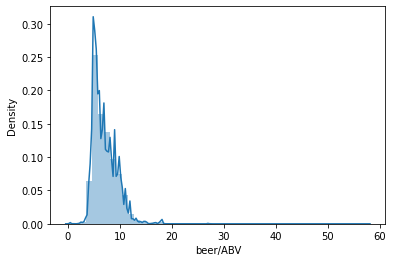

In [30]:
# ABV 분포
sns.distplot(beeradvocate[beeradvocate['beer/ABV'] > 0]['beer/ABV'])

In [31]:
# ABV 통계치
beeradvocate[beeradvocate['beer/ABV'] > 0][['beer/ABV']].describe()

,beer/ABV
count,1.518829e+06
mean,7.042387e+00
std,2.322526e+00
min,1.000000e-02
25%,5.200000e+00
50%,6.500000e+00
75%,8.500000e+00
max,5.770000e+01


In [32]:
# ABV 최대값
beeradvocate[beeradvocate['beer/ABV'] > 0]['beer/ABV'].max()

57.7

In [33]:
# ABV 최소값
beeradvocate[beeradvocate['beer/ABV'] > 0]['beer/ABV'].min()

0.01

### style

In [34]:
beeradvocate['beer/style'].value_counts()

American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: beer/style, Length: 104, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='beer/style'>

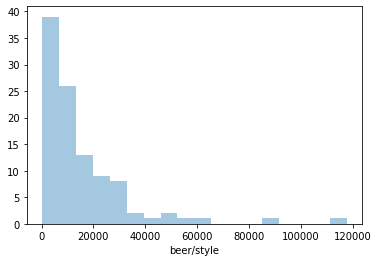

In [35]:
# 각 리뷰 개수 별 맥주 style 수 분포
sns.distplot(beeradvocate['beer/style'].value_counts(), kde=False)

### review/appear

In [36]:
beeradvocate['review/appearance'].value_counts()

4.0    674186
3.5    318529
4.5    288108
3.0    166009
5.0     65398
2.5     39493
2.0     25414
1.5      6147
1.0      3323
0.0         7
Name: review/appearance, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review/appearance'>

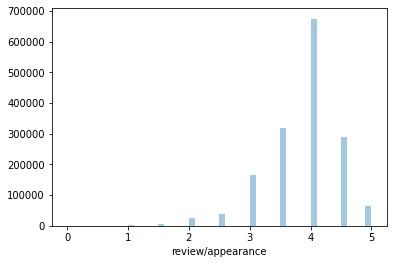

In [37]:
sns.distplot(beeradvocate['review/appearance'], kde = False)

### review/aroma

In [38]:
beeradvocate['review/aroma'].value_counts()

4.0    557383
3.5    365312
4.5    271450
3.0    200030
2.5     66359
5.0     64117
2.0     42566
1.5     12524
1.0      6873
Name: review/aroma, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review/aroma'>

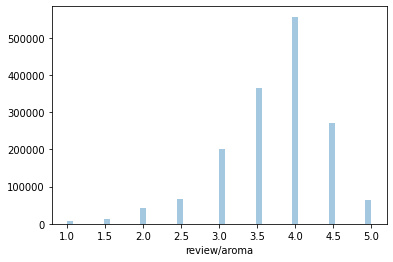

In [39]:
sns.distplot(beeradvocate['review/aroma'], kde = False)

### review/palate

In [40]:
beeradvocate['review/palate'].value_counts()

4.0    606711
3.5    338585
4.5    253102
3.0    206932
2.5     62842
5.0     62190
2.0     38333
1.5     11045
1.0      6874
Name: review/palate, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review/palate'>

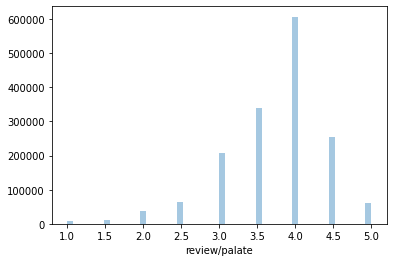

In [41]:
sns.distplot(beeradvocate['review/palate'], kde = False)

### review/taste

In [42]:
beeradvocate['review/taste'].value_counts()

4.0    541429
4.5    336162
3.5    324541
3.0    166860
5.0     83977
2.5     66534
2.0     41992
1.5     15128
1.0      9991
Name: review/taste, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review/taste'>

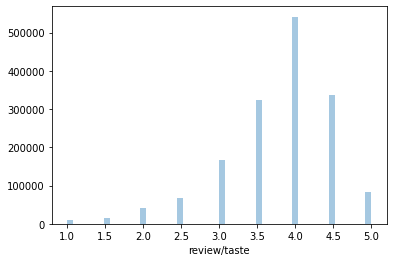

In [43]:
sns.distplot(beeradvocate['review/taste'], kde = False)

### review/overall

In [44]:
beeradvocate['review/overall'].value_counts()

4.0    582764
4.5    324385
3.5    301817
3.0    165644
5.0     91320
2.5     58523
2.0     38225
1.5     12975
1.0     10954
0.0         7
Name: review/overall, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review/overall'>

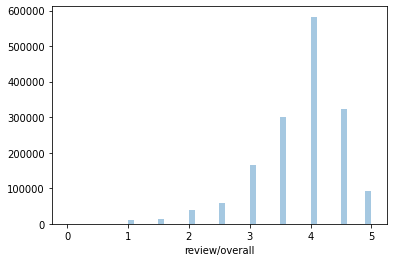

In [45]:
sns.distplot(beeradvocate['review/overall'], kde = False)

### review/time

In [46]:
beeradvocate['review/time']

0          1.234818e+09
1          1.235915e+09
2          1.235917e+09
3          1.234725e+09
4          1.293735e+09
               ...     
1586609    1.162685e+09
1586610    1.161049e+09
1586611    1.160703e+09
1586612    1.160023e+09
1586613    1.160005e+09
Name: review/time, Length: 1586614, dtype: float64

In [47]:
beeradvocate['review/time'] = pd.to_datetime(beeradvocate['review/time'], unit='s')

In [48]:
beeradvocate['review/time'].describe()

/tmp/ipykernel_86178/1831526385.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  beeradvocate['review/time'].describe()


count                 1586614
unique                1577960
top       2004-11-30 00:00:00
freq                       21
first     1996-08-22 00:00:01
last      2012-01-11 12:35:48
Name: review/time, dtype: object

In [49]:
beeradvocate['review/time'].value_counts()

2004-11-30 00:00:00    21
2002-09-04 01:00:00     8
1999-05-11 00:00:01     8
1998-06-06 00:00:01     7
2001-01-30 00:00:01     7
                       ..
2006-06-14 01:13:47     1
2006-07-02 20:56:02     1
2003-02-06 21:25:57     1
2003-02-13 14:31:16     1
2006-10-04 23:41:59     1
Name: review/time, Length: 1577960, dtype: int64

### review/profilename

In [50]:
beeradvocate['review/profileName'].value_counts()

northyorksammy    5817
BuckeyeNation     4661
mikesgroove       4617
Thorpe429         3518
womencantsail     3497
                  ... 
TheEdge              1
dvelcich             1
rayre                1
ashleyobrian         1
joeebbs              1
Name: review/profileName, Length: 33388, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review/profileName'>

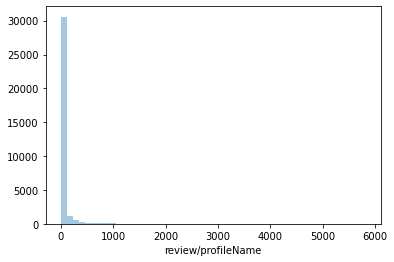

In [51]:
# 각 리뷰 개수 별 유저 수 분포
sns.distplot(beeradvocate['review/profileName'].value_counts(), kde=False)

In [52]:
beeradvocate['review/profileName'].value_counts().value_counts()

1       10443
2        4107
3        2426
4        1600
5        1245
        ...  
796         1
795         1
794         1
793         1
5817        1
Name: review/profileName, Length: 1000, dtype: int64

### review/text

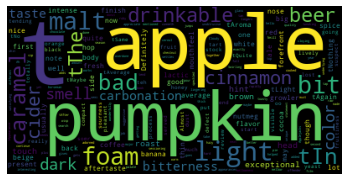

In [53]:
text = beeradvocate['review/text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()